# Generalization Error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dvc = 10
delta = 0.05
N = 460000
eps = math.sqrt((8.0/N)*((dvc*math.log(2.0*N))-math.log(delta/4.0)))
print ('When N is:', N, ', eps is:',eps)

When N is: 460000 , eps is: 0.04964277890917068


In [3]:
#OG VC
def vc_eps2(delta, N, dvc):
    eps = math.sqrt((8.0/N)*((dvc*math.log(2.0*N))-math.log(delta/4.0)))
    return eps
def vc_2(N):
    return vc_eps2(0.05, N, 50)
vc_vec2 = np.vectorize(vc_2)

In [4]:
#rademccherPB
def rademacher_eps2(delta, N, dvc):
    eps = math.sqrt((2.0/N)*(math.log(2.0*N)+(dvc*math.log(N)))) + math.sqrt((2.0/N) * math.log(1.0/delta)) + (1.0/N)
    return eps
def rademacher_2(N):
    return rademacher_eps2(0.05, N, 50)
rademacher_vec2 = np.vectorize(rademacher_2)

In [5]:
#Parrondo
def parrondo_eps2(delta, N, dvc):
    eps_range = np.arange(0.0,10, 0.0001)
    breakp = False
    eps = eps_range[0]
    for e in eps_range:
        bound = math.sqrt((1.0/N) * ((2.0*e) + math.log(6.0/delta) + (dvc*math.log(2.0*N))))
        hold = e <= bound
        if hold == False and breakp == True:
            break
        elif hold == True:
            breakp = True
            eps = e
    return eps
def parrondo_2(N):
    return parrondo_eps2(0.05, N, 50)
parrondo_vec2 = np.vectorize(parrondo_2)

In [6]:
#devroye
def devroye_eps2(delta, N, dvc):
    eps_range = np.arange(0.0,10, 0.0001)
    breakp = False
    eps = eps_range[0]
    for e in eps_range: 
        bound = math.sqrt((1.0/(2.0*N))*(((4.0*e)*(1.0+e)) + math.log(4.0/delta) + ((2.0*dvc)*math.log(N))))
        hold = e <= bound
        if hold == False and breakp == True:
            break
        elif hold == True:
            breakp = True
            eps = e
    return eps
def devroye_2(N):
    return devroye_eps2(0.05, N, 50)
devroye_vec2 = np.vectorize(devroye_2)

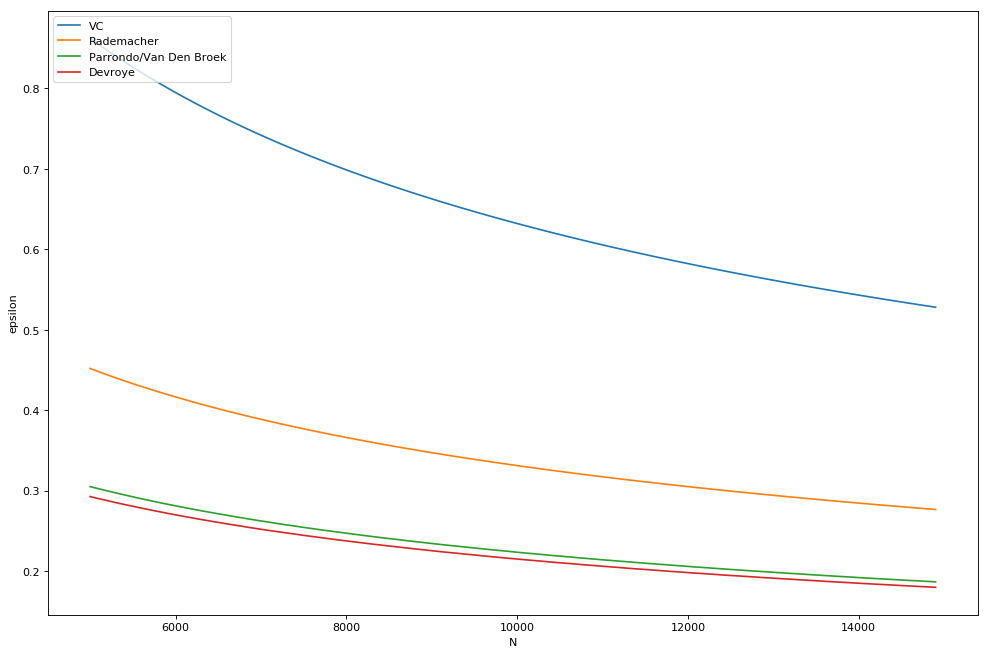

In [7]:
#prob2
prob2 = {}
prob2["N"] = np.arange(5000,15000, 100)
prob2["ogvc"] = vc_vec2(prob2["N"])
prob2["rademccherPB"] = rademacher_vec2(prob2["N"])
prob2["Parrondo"] = parrondo_vec2(prob2["N"])
prob2["devroye"] = devroye_vec2(prob2["N"])

prob2["plot"] = plt.figure(figsize=(15,10), dpi=80)
prob2["ax"] = prob2["plot"].add_subplot(111)
prob2["ax"].set_xlabel("N")
prob2["ax"].set_ylabel("epsilon")
prob2["ax"].plot(prob2["N"], prob2["ogvc"], label="VC")
prob2["ax"].plot(prob2["N"], prob2["rademccherPB"], label="Rademacher")
prob2["ax"].plot(prob2["N"], prob2["Parrondo"], label="Parrondo/Van Den Broek")
prob2["ax"].plot(prob2["N"], prob2["devroye"], label = "Devroye")
prob2["ax"].legend(loc='upper left')

plt.show()